# EDA - Exploratory Data Analysis on the Titanic Dataset

This notebook aims at exploring the Titanic dataset to understand the relationship between various features and the survival rate of passengers. Only correlations and trends are explored in this notebook. No historical context is used to support feature interpretation.

---

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Charger les données
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [34]:
df = pd.read_csv(url)
data = df.copy()

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Count the number of missing values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---

# EDA

Understand and analyse features

## Analyse who survived

### Men/Women (survival) rate

In [10]:
# Man et woman survival rate
female = df.loc[df.Sex == 'female']["Survived"]
survival_rate_female = sum(female)/len(female)

male = df.loc[df.Sex == 'male']["Survived"]
survival_rate_male = sum(male)/len(male)

In [11]:
rate_female = len(female)/len(df)
rate_male = len(male)/len(df)

In [12]:
print(f"The percentage of women on the Titanic is {rate_female}%")
print(f"The percentage of men on the Titanic is {rate_male}%")

print(f"\nThe survival rate of women is {survival_rate_female}%")
print(f"The survival rate of men is {survival_rate_male}%")

The percentage of women on the Titanic is 0.35241301907968575%
The percentage of men on the Titanic is 0.6475869809203143%

The survival rate of women is 0.7420382165605095%
The survival rate of men is 0.18890814558058924%


### Class (survival) rate

In [13]:
# Class survival rate
class1 = df.loc[df.Pclass == 1]["Survived"]
class2 = df.loc[df.Pclass == 2]["Survived"]
class3 = df.loc[df.Pclass == 3]["Survived"]

survival_rate_class1 = sum(class1)/len(class1)
survival_rate_class2 = sum(class2)/len(class2)
survival_rate_class3 = sum(class3)/len(class3)

print(f"The survival rate of passengers in class 1 is {survival_rate_class1}%")
print(f"The survival rate of passengers in class 2 is {survival_rate_class2}%")
print(f"The survival rate of passengers in class 3 is {survival_rate_class3}%")


The survival rate of passengers in class 1 is 0.6296296296296297%
The survival rate of passengers in class 2 is 0.47282608695652173%
The survival rate of passengers in class 3 is 0.24236252545824846%


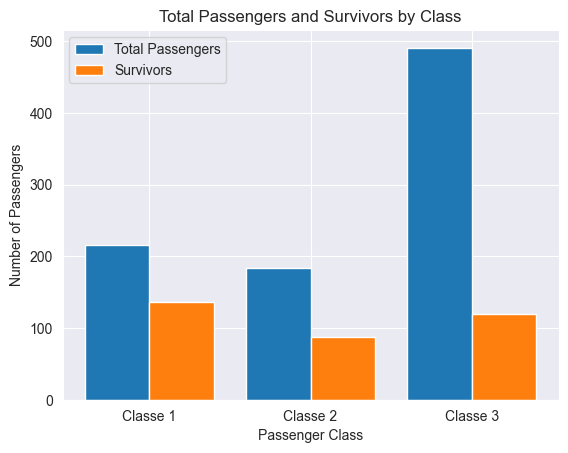

In [14]:
# Data for plotting
labels = ['Classe 1', 'Classe 2', 'Classe 3']
total_passengers = [len(class1), len(class2), len(class3)]
survived_passengers = [sum(class1), sum(class2), sum(class3)]

x = np.arange(len(labels))  # Label locations
width = 0.4  # Bar width

# Creating the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, total_passengers, width, label='Total Passengers')
bars2 = ax.bar(x + width/2, survived_passengers, width, label='Survivors')

# Labels and title
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Total Passengers and Survivors by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Fare and survival

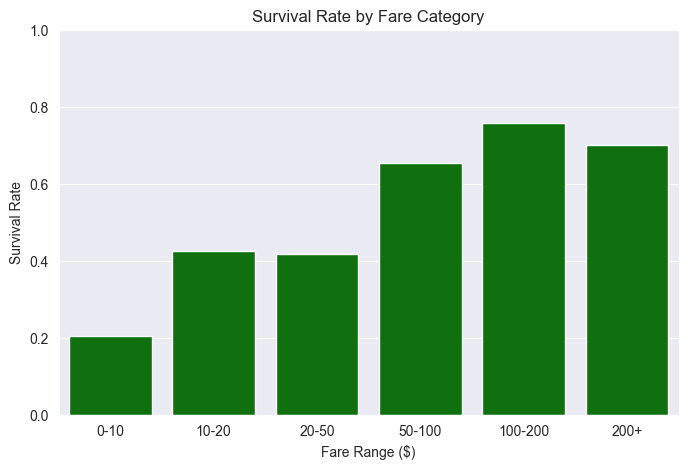

In [16]:
# Create fare bins
fare_bins = [0, 10, 20, 50, 100, 200, 600]  # Adjust bins as needed
fare_labels = ["0-10", "10-20", "20-50", "50-100", "100-200", "200+"]

data["Fare_Binned"] = pd.cut(data["Fare"], bins=fare_bins, labels=fare_labels)

# Compute survival rate per fare bin
survival_rate = data.groupby("Fare_Binned")["Survived"].mean()  # Mean gives the survival rate (1 = survived, 0 = not)

# Plot survival rate
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate.index, y=survival_rate.values, color="green")

# Labels and title
plt.xlabel("Fare Range ($)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Fare Category")
plt.ylim(0, 1)  # Survival rate is between 0 and 1
plt.show()


The higher the ticket price, the higher the survival rate. This trend suggests that passengers who purchased more expensive tickets (likely belonging to higher socio-economic classes) had better access to lifeboats and safety measures.

### Age distribution

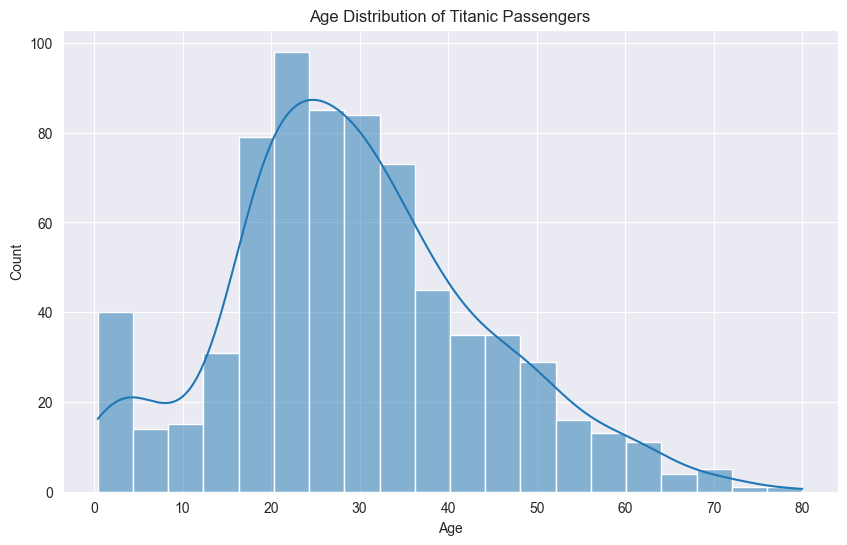

In [17]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


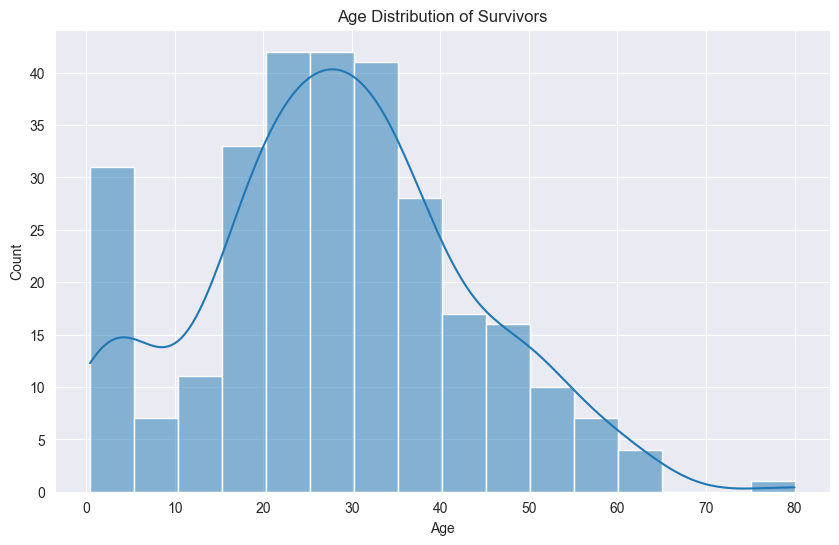

In [18]:
# Age distribution of survivors
plt.figure(figsize=(10, 6))
sns.histplot(df[df.Survived == 1]["Age"], kde=True)
plt.title("Age Distribution of Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The data does not show a strong or obvious relationship between a passenger's age and their likelihood of survival. 

### Embarked

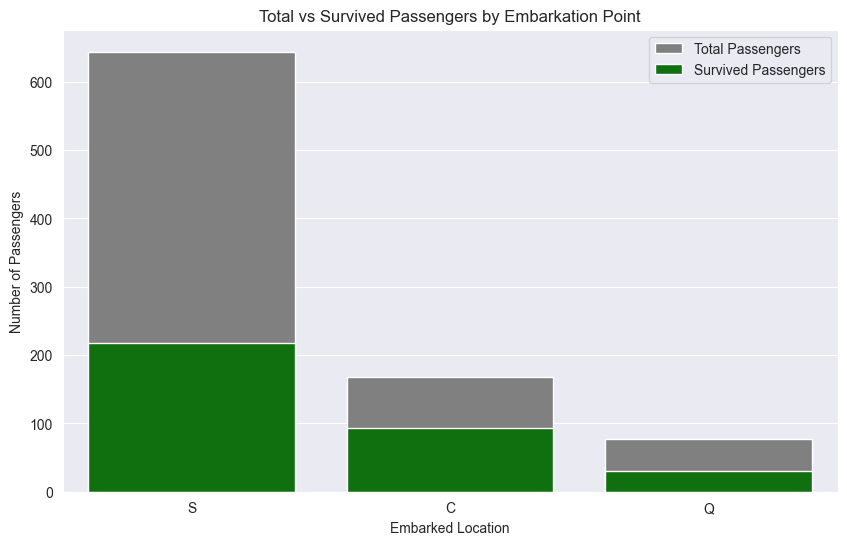

In [19]:
# Embarked number vs survival rate
total_embarked = df["Embarked"].value_counts()

survived_embarked = data[data["Survived"] == 1]["Embarked"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_embarked.index, y=total_embarked.values, color="gray", label="Total Passengers")
sns.barplot(x=survived_embarked.index, y=survived_embarked.values, color="green", label="Survived Passengers")

# Labels and title
plt.xlabel("Embarked Location")
plt.ylabel("Number of Passengers")
plt.title("Total vs Survived Passengers by Embarkation Point")
plt.legend()
plt.show()

Passengers who embarked at Southampton (S) had a higher survival rate compared to those who boarded at other ports (e.g., Cherbourg or Queenstown).

## Correlation between variables

In [35]:
# Impute categorical variables
data["Sex"] = data["Sex"].map({"female": 0, "male": 1})

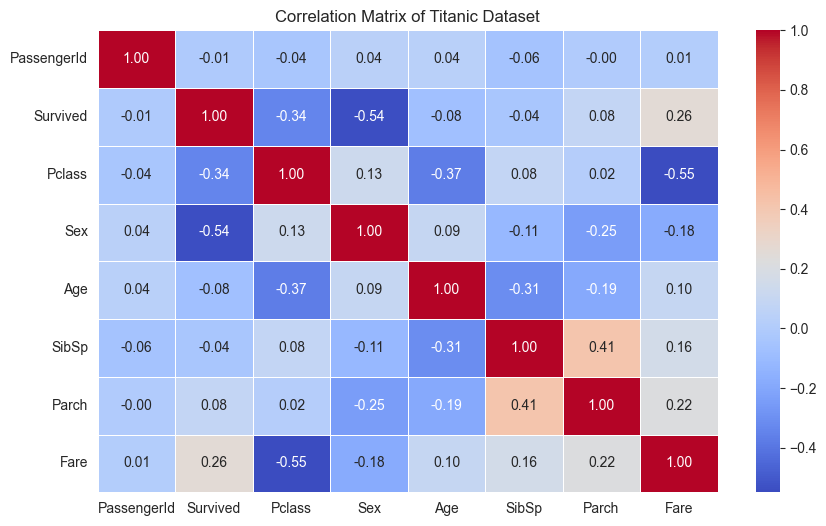

In [36]:
# Compute correlation matrix
corr_matrix = data[data.select_dtypes(exclude="object").columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()

**Highest correlations** :
- Fare et Pclass
- Survived et Sex
- Survived et Pclass
- Survived et Fare

Women and passengers in higher classes had a higher chance of survival.